### Esercizio 2 Regressione Lineare Multipla

Utilizzate la linear regression multipla per analizzare il dataframe a questo link https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction utilizzate i dati sulle età delle case e la distanza dalla metro per prevedere il costo della casa , allenate l'algoritmo, testatelo e poi realizzate i vari grafici

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Real estate.csv", index_col = 0)

df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
X = df[['X2 house age','X3 distance to the nearest MRT station']]
X.shape

(414, 2)

In [5]:
y = df['Y house price of unit area']
y.shape

(414,)

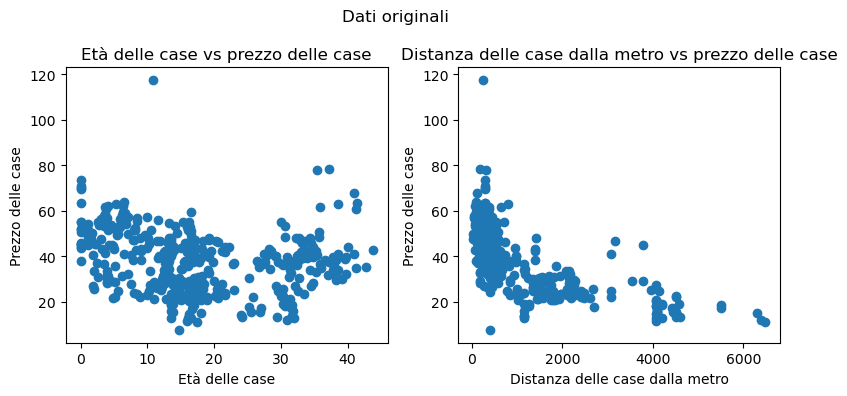

In [6]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati originali")

plt.subplot(1,2,1)
plt.scatter(X['X2 house age'],y)
plt.title("Età delle case vs prezzo delle case")
plt.xlabel("Età delle case")
plt.ylabel("Prezzo delle case")

plt.subplot(1,2,2)
plt.scatter(X['X3 distance to the nearest MRT station'],y)
plt.title("Distanza delle case dalla metro vs prezzo delle case")
plt.xlabel("Distanza delle case dalla metro")
plt.ylabel("Prezzo delle case")

plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y)

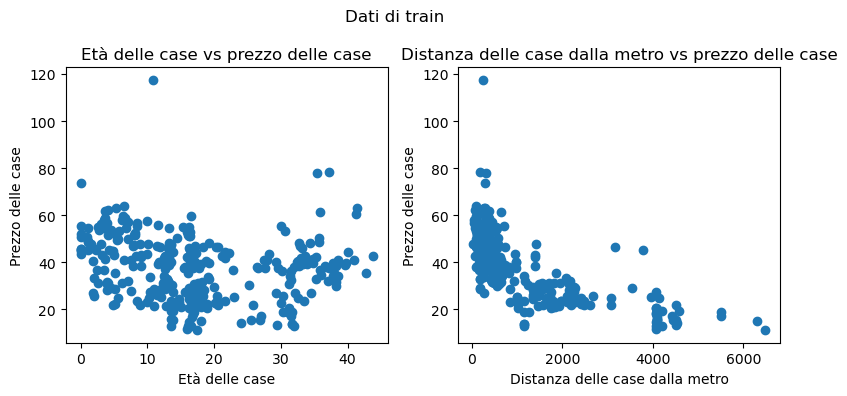

In [8]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati di train")

plt.subplot(1,2,1)
plt.scatter(X_train['X2 house age'],y_train)
plt.title("Età delle case vs prezzo delle case")
plt.xlabel("Età delle case")
plt.ylabel("Prezzo delle case")

plt.subplot(1,2,2)
plt.scatter(X_train['X3 distance to the nearest MRT station'],y_train)
plt.title("Distanza delle case dalla metro vs prezzo delle case")
plt.xlabel("Distanza delle case dalla metro")
plt.ylabel("Prezzo delle case")

plt.tight_layout()
plt.show()

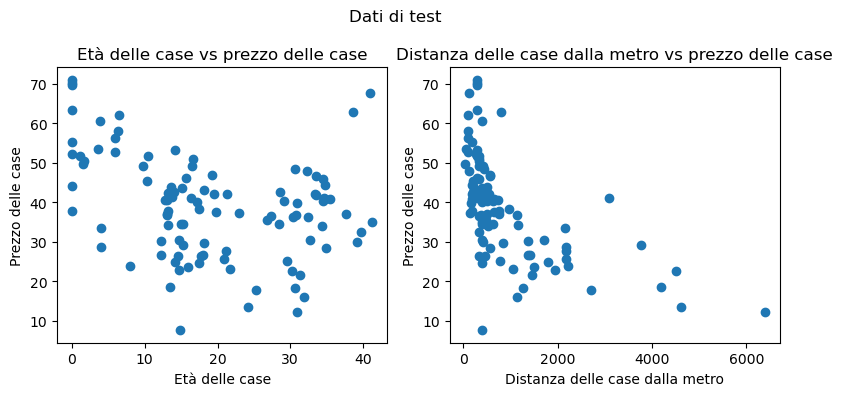

In [9]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati di test")

plt.subplot(1,2,1)
plt.scatter(X_test['X2 house age'],y_test)
plt.title("Età delle case vs prezzo delle case")
plt.xlabel("Età delle case")
plt.ylabel("Prezzo delle case")

plt.subplot(1,2,2)
plt.scatter(X_test['X3 distance to the nearest MRT station'],y_test)
plt.title("Distanza delle case dalla metro vs prezzo delle case")
plt.xlabel("Distanza delle case dalla metro")
plt.ylabel("Prezzo delle case")

plt.tight_layout()
plt.show()

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(f"Coefficiente b1: {model.coef_[0]:.2f}, Coefficiente b2: {model.coef_[1]:.2f}")
print(f"Intercetta b0: {model.intercept_:.2f}")

Coefficiente b1: -0.21, Coefficiente b2: -0.01
Intercetta b0: 49.69


In [12]:
y_pred = model.predict(X_test)
y_pred

array([42.15491577, 43.43281145, 37.19562673, 10.34999411, 35.60348129,
       43.79343416, 44.60085904, 39.99731761, 40.91875962, 47.53528184,
       34.72182982, 40.3928974 , 38.59468043, 47.53528184, 45.48152745,
       43.92333698, 41.45800053, 39.01086189, 42.2493293 , 41.51082058,
       38.42435322, 41.36574292, 48.15650759, 44.6680372 , 29.35238635,
       44.00372718, 43.40399396, 41.60409024, 42.36862712, 18.87161367,
       47.53528184, 39.32358054, 34.06081345, 19.93175544, 47.70875099,
       32.46150809, 44.48914647, 32.61469665, 42.73728219, 46.08811131,
       35.85503829, 43.77290782, 39.89834812, 40.06387264, 47.53528184,
       37.69515552, 37.48560381, 43.90254485, 43.76120834, 33.54410125,
       43.28083594, 43.18098314, 38.86042772, 35.42602061, 38.67438299,
       43.59067113, 24.61452478, 38.34784177, 48.32509709, 47.72927733,
       43.37470003, 40.09297595, 47.81138267, 48.55352485, 40.21914733,
       16.09668224, 39.82038945, 43.28834363, 41.6782928 , 45.03

Errore quadratico medio: 101.27
R2: 0.40


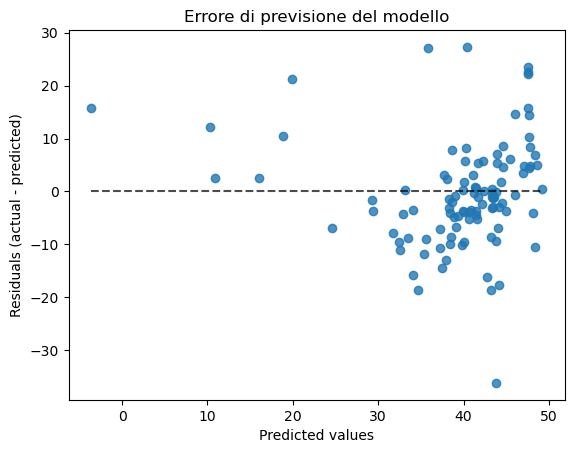

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

errore_quad = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Errore quadratico medio: {errore_quad:.2f}")
print(f"R2: {r2:.2f}")

display = PredictionErrorDisplay(y_true = y_test, y_pred = y_pred)
display.plot()
plt.title("Errore di previsione del modello")
plt.show()

In [14]:
y_test.min()

7.6

In [15]:
y_test.max()

71.0

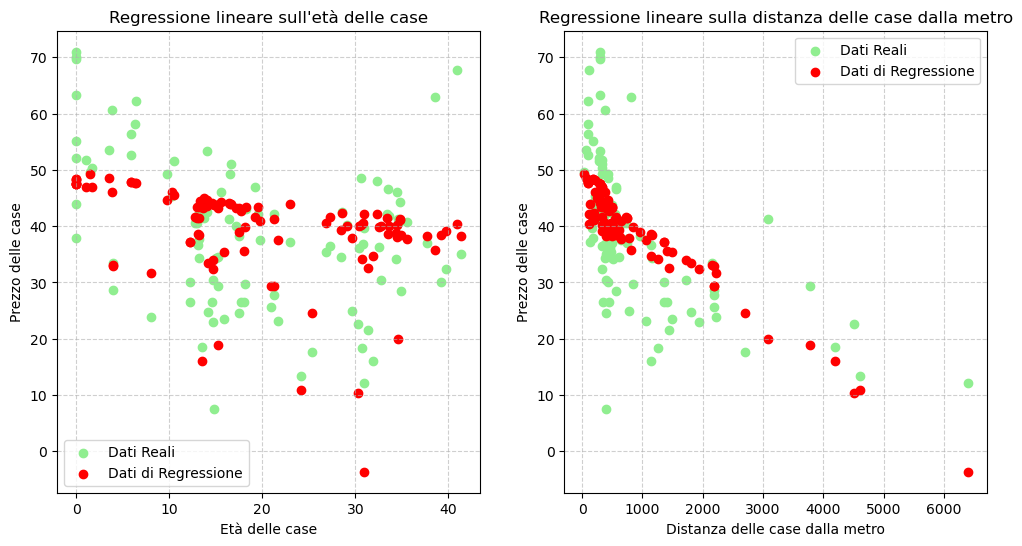

In [16]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.scatter(X_test['X2 house age'], y_test, color='lightgreen', label='Dati Reali')
plt.scatter(X_test['X2 house age'], y_pred, color='red', label='Dati di Regressione')
plt.xlabel('Età delle case')
plt.ylabel('Prezzo delle case')
plt.title("Regressione lineare sull'età delle case")
plt.legend()
plt.grid(True, alpha = 0.6, linestyle = '--')

plt.subplot(1,2,2)
plt.scatter(X_test['X3 distance to the nearest MRT station'], y_test, color='lightgreen', label='Dati Reali')
plt.scatter(X_test['X3 distance to the nearest MRT station'], y_pred, color='red', label='Dati di Regressione')
plt.xlabel('Distanza delle case dalla metro')
plt.ylabel('Prezzo delle case')
plt.title('Regressione lineare sulla distanza delle case dalla metro')
plt.legend()
plt.grid(True, alpha = 0.6, linestyle = '--')

plt.show()

### Prova con Standardizzazione dei dati di X

In [17]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_stand = X_scaler.fit_transform(X)
X_stand

array([[ 1.25562833e+00, -7.92495036e-01],
       [ 1.57086215e-01, -6.16611626e-01],
       [-3.87790673e-01, -4.14015273e-01],
       [-3.87790673e-01, -4.14015273e-01],
       [-1.11722264e+00, -5.49996729e-01],
       [-9.32667560e-01,  8.65586090e-01],
       [ 1.47533675e+00, -3.65237420e-01],
       [ 2.27392910e-01, -6.31677813e-01],
       [ 1.22926332e+00,  3.51277737e+00],
       [ 1.64728247e-02,  5.54738198e-01],
       [ 1.50170176e+00, -5.38379101e-01],
       [-1.00297426e+00, -7.88070707e-01],
       [-4.14155683e-01, -4.69349292e-01],
       [ 2.36181247e-01,  1.09929912e+00],
       [-3.96579009e-01,  6.42180817e-02],
       [ 1.58079679e+00, -4.00351927e-01],
       [-1.55663948e+00, -6.27397814e-01],
       [-1.10384908e-03, -5.81503465e-01],
       [-7.14105443e-02, -5.67791729e-01],
       [-1.42481443e+00, -8.41278743e-01],
       [-1.16116432e+00,  9.45586288e-01],
       [-6.33864106e-01, -6.38365109e-01],
       [-2.64753956e-01,  2.19147019e-01],
       [-6.

In [18]:
from sklearn.model_selection import train_test_split
X_train_stand,X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand,y)

In [19]:
model.fit(X_train_stand, y_train_stand)

LinearRegression()

In [20]:
print(f"Coefficiente b1: {model.coef_[0]:.2f}, Coefficiente b2: {model.coef_[1]:.2f}")
print(f"Intercetta b0: {model.intercept_:.2f}")

Coefficiente b1: -2.68, Coefficiente b2: -9.22
Intercetta b0: 38.15


In [21]:
y_pred_stand = model.predict(X_test_stand)
y_pred_stand

array([36.94778349, 29.97713769, 43.58571465, 46.01229914, 43.57522171,
       27.38014505, 42.37730711, 37.65031727, 41.35012951, 43.23254162,
       38.46181126, 39.59669575, 32.8958936 , 27.33305981, 11.59020852,
       45.33203086, 43.87365043, 39.6941602 , 39.85800564, 36.5288682 ,
       43.88584982, 39.51369278, 11.09063741, 45.73246913, 38.23976594,
       32.26830699, 32.66621875, 40.76914783, 11.47945466, 35.27338658,
       44.31647175, 43.58571465, 43.8882195 , 16.73549233, 45.11890604,
       41.50661208, 30.39495194, 44.81086677, 43.51508679, 29.43764781,
       36.83734461, 48.12532123, 48.57168151, 39.761041  , 47.47885108,
       29.69746236, 41.64883767, 45.37639663, 43.34051853, 48.57168151,
       16.36762408, 33.35789583, 33.57476725, 42.07150041, 42.24392468,
       38.54625609, 45.91007415, 32.94264275, 44.31647175, 37.88274426,
       43.97093479, 46.54427933, -1.30522198, 41.217861  , 48.10351068,
       46.11854766, 44.65890524, 37.28624352, 40.12454015, 43.99

Errore quadratico medio: 97.76
R2: 0.42


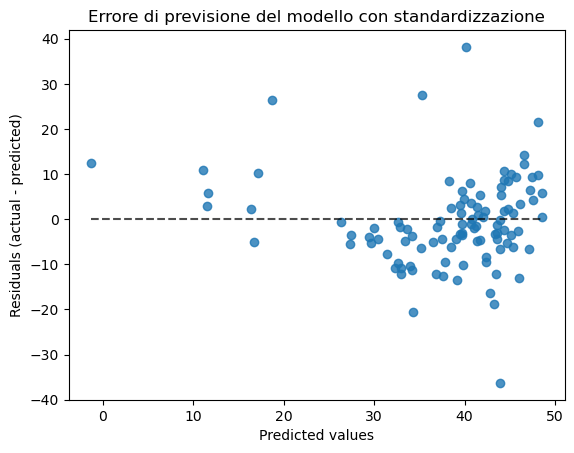

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

errore_quad = mean_squared_error(y_test_stand, y_pred_stand)
r2 = r2_score(y_test_stand, y_pred_stand)

print(f"Errore quadratico medio: {errore_quad:.2f}")
print(f"R2: {r2:.2f}")

display = PredictionErrorDisplay(y_true = y_test_stand, y_pred = y_pred_stand)
display.plot()
plt.title("Errore di previsione del modello con standardizzazione")
plt.show()

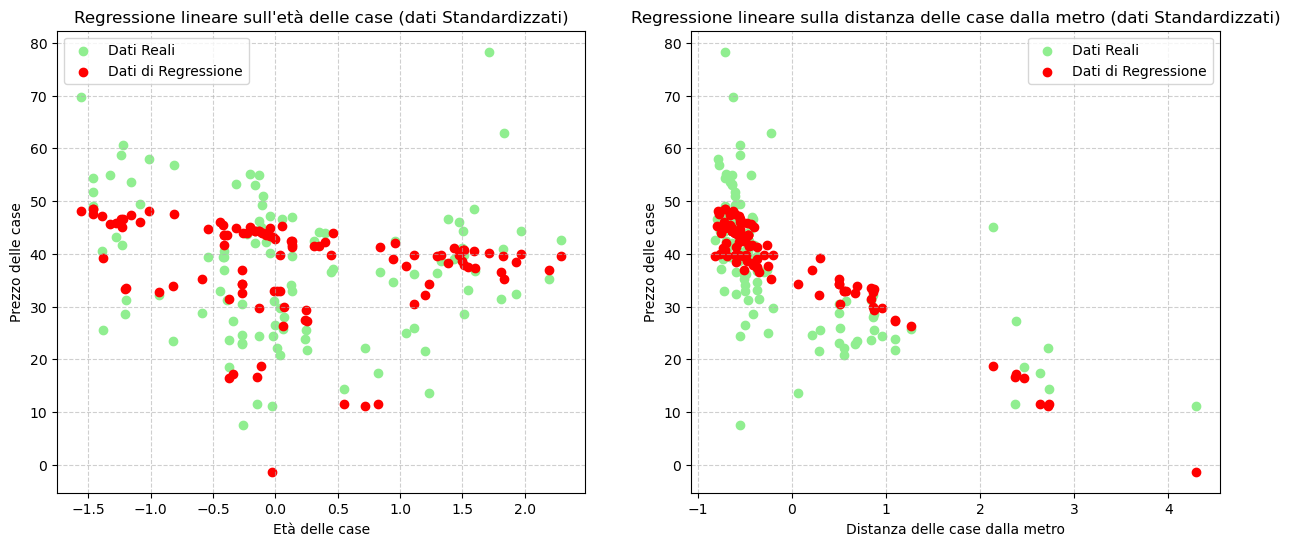

In [23]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.scatter(X_test_stand[:,0], y_test_stand, color='lightgreen', label='Dati Reali')
plt.scatter(X_test_stand[:,0], y_pred_stand, color='red', label='Dati di Regressione')
plt.xlabel('Età delle case')
plt.ylabel('Prezzo delle case')
plt.title("Regressione lineare sull'età delle case (dati Standardizzati)")
plt.legend()
plt.grid(True, alpha = 0.6, linestyle = '--')

plt.subplot(1,2,2)
plt.scatter(X_test_stand[:,1], y_test_stand, color='lightgreen', label='Dati Reali')
plt.scatter(X_test_stand[:,1], y_pred_stand, color='red', label='Dati di Regressione')
plt.xlabel('Distanza delle case dalla metro')
plt.ylabel('Prezzo delle case')
plt.title('Regressione lineare sulla distanza delle case dalla metro (dati Standardizzati)')
plt.legend()
plt.grid(True, alpha = 0.6, linestyle = '--')

plt.show()